In [3]:
import numpy as np
from sklearn import decomposition
from scipy import linalg
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import os
os.chdir('/content/drive/My Drive/Colab Notebooks')

In [ ]:
!pwd

/content/drive/My Drive/Colab Notebooks


In [4]:
quora = pd.read_csv('quora_questions.csv')

In [5]:
quora.head()

,Question
0,What is the step by step guide to invest in sh...
1,What is the story of Kohinoor (Koh-i-Noor) Dia...
2,How can I increase the speed of my internet co...
3,Why am I mentally very lonely? How can I solve...
4,"Which one dissolve in water quikly sugar, salt..."


In [6]:
quora.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404289 entries, 0 to 404288
Data columns (total 1 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Question  404289 non-null  object
dtypes: object(1)
memory usage: 3.1+ MB


**Removing Special Characters**

In [10]:
quora['Question'] = quora['Question'].str.replace("[^a-zA-Z]"," ")

In [13]:
quora.head()

,Question
0,what is the step by step guide to invest in sh...
1,what is the story of kohinoor koh i noor dia...
2,how can i increase the speed of my internet co...
3,why am i mentally very lonely how can i solve...
4,which one dissolve in water quikly sugar salt...


**Converting to lower case**

In [12]:
quora['Question'] = quora['Question'].str.lower()

**Data Processing**

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [15]:
tfidf = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')

In [16]:
train_vectors = tfidf.fit_transform(quora['Question'])
train_vectors.shape

(404289, 36766)

In [17]:
train_vectors

<404289x36766 sparse matrix of type '<class 'numpy.float64'>'
	with 1959825 stored elements in Compressed Sparse Row format>

In [18]:
vocab = np.array(tfidf.get_feature_names())

In [19]:
vocab.shape

(36766,)

In [20]:
vocab[7000:7050]

array(['continents', 'contingency', 'contingent', 'continous',
       'continously', 'continual', 'continually', 'continuation',
       'continue', 'continued', 'continues', 'continuing', 'continuity',
       'continuous', 'continuously', 'continuum', 'contorted', 'contour',
       'contours', 'contraception', 'contraceptive', 'contract',
       'contracted', 'contracting', 'contraction', 'contractionary',
       'contractions', 'contractor', 'contractors', 'contracts',
       'contractual', 'contractually', 'contradict', 'contradicted',
       'contradicting', 'contradiction', 'contradictions',
       'contradictory', 'contradicts', 'contrapunct', 'contrarian',
       'contrary', 'contrast', 'contrasted', 'contrasting', 'contrastive',
       'contretemps', 'contribute', 'contributed', 'contributes'],
      dtype='<U28')

**Truncated SVD**

In [21]:
from sklearn.decomposition import TruncatedSVD

In [22]:
model = TruncatedSVD(n_components=14,random_state=42)

In [23]:
# fit the model to train data
model.fit(train_vectors)

TruncatedSVD(algorithm='randomized', n_components=14, n_iter=5, random_state=42,
             tol=0.0)

In [24]:
# Displaying topics
len(tfidf.get_feature_names())

36766

In [25]:
import random
for i in range(10):
    random_word_id = random.randint(0,36766)
    print(tfidf.get_feature_names()[random_word_id])

soups
inverters
valuation
capella
weirdest
practiced
bataan
programme
alligators
disclosed


In [26]:
len(model.components_)

14

In [27]:
model.components_

array([[ 2.06257263e-04,  4.20099315e-05,  4.95429224e-06, ...,
         4.65767411e-07,  5.59155442e-06,  5.68304963e-05],
       [ 1.38062423e-05,  2.95351043e-04,  1.38143819e-05, ...,
         1.03553103e-06,  9.23235719e-06,  4.16532380e-04],
       [-2.02694271e-05, -3.20349687e-04, -1.01102673e-05, ...,
        -4.53532365e-07, -5.99313929e-07, -3.53600803e-04],
       ...,
       [ 1.25418439e-04, -6.22755620e-05,  2.94886644e-06, ...,
         5.10008941e-06, -2.52545443e-05, -4.41264827e-05],
       [ 3.48801694e-05, -1.56065361e-05,  1.57258162e-06, ...,
         3.93179396e-06,  6.89199513e-06, -2.84947366e-05],
       [-4.37869712e-05, -1.10010556e-04, -4.31627324e-06, ...,
        -1.55792308e-05,  5.75855553e-06, -7.51063095e-05]])

In [28]:
len(model.components_[0])

36766

In [29]:
single_topic = model.components_[0]

In [30]:
# Sorting the array by indices
single_topic.argsort()

array([18964, 12452, 25962, ..., 18439, 35723,  3239])

In [31]:
# Finding least and most representative words
single_topic[18964]

-8.751517567539345e-18

In [32]:
single_topic[3239]

0.8530209122017478

In [33]:
# Indices of top 10 words for this topic:
single_topic.argsort()[-10:]

array([18702, 26338,  9531, 22893, 19487, 21036, 15953, 18439, 35723,
        3239])

In [34]:
top_word_indices = single_topic.argsort()[-10:]
for index in top_word_indices:
    print(tfidf.get_feature_names()[index])

life
quora
does
online
make
money
india
learn
way
best


**Viewing the top topics**

In [35]:
for index,topic in enumerate(model.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    print([tfidf.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')

THE TOP 15 WORDS FOR TOPIC #0
['programming', 'ways', 'book', 'books', 'movies', 'life', 'quora', 'does', 'online', 'make', 'money', 'india', 'learn', 'way', 'best']


THE TOP 15 WORDS FOR TOPIC #1
['good', 'question', 'earn', 'work', 'life', 'online', 'feel', 'questions', 'mean', 'like', 'people', 'make', 'money', 'quora', 'does']


THE TOP 15 WORDS FOR TOPIC #2
['black', 'answer', 'youtube', 'answers', 'ways', 'way', 'question', 'ask', 'questions', 'people', 'earn', 'online', 'quora', 'make', 'money']


THE TOP 15 WORDS FOR TOPIC #3
['know', 'answered', 'easily', 'improvement', 'delete', 'asked', 'google', 'best', 'answers', 'answer', 'ask', 'question', 'questions', 'people', 'quora']


THE TOP 15 WORDS FOR TOPIC #4
['important', 'thing', 'love', 'things', 'purpose', 'did', 'like', 'think', 'good', 'donald', 'know', 'trump', 'india', 'people', 'life']


THE TOP 15 WORDS FOR TOPIC #5
['better', 'world', 'election', 'pakistan', 'war', 'did', 'think', 'win', 'hillary', 'people', 'clinto

In [36]:
def plot_important_features(coef, feature_names, top_n=20, ax=None):
    if ax is None:
        ax = plt.gca()
    inds = np.argsort(np.abs(coef))[-top_n:]
    important_coefs = coef[inds]
    sort_sign = np.argsort(important_coefs)
    myrange = range(len(inds))
    combined_inds = inds[sort_sign]

    ax.bar(myrange, coef[combined_inds])
    ax.set_xticks(myrange)
    ax.set_xticklabels(feature_names[combined_inds], rotation=60, ha="right")

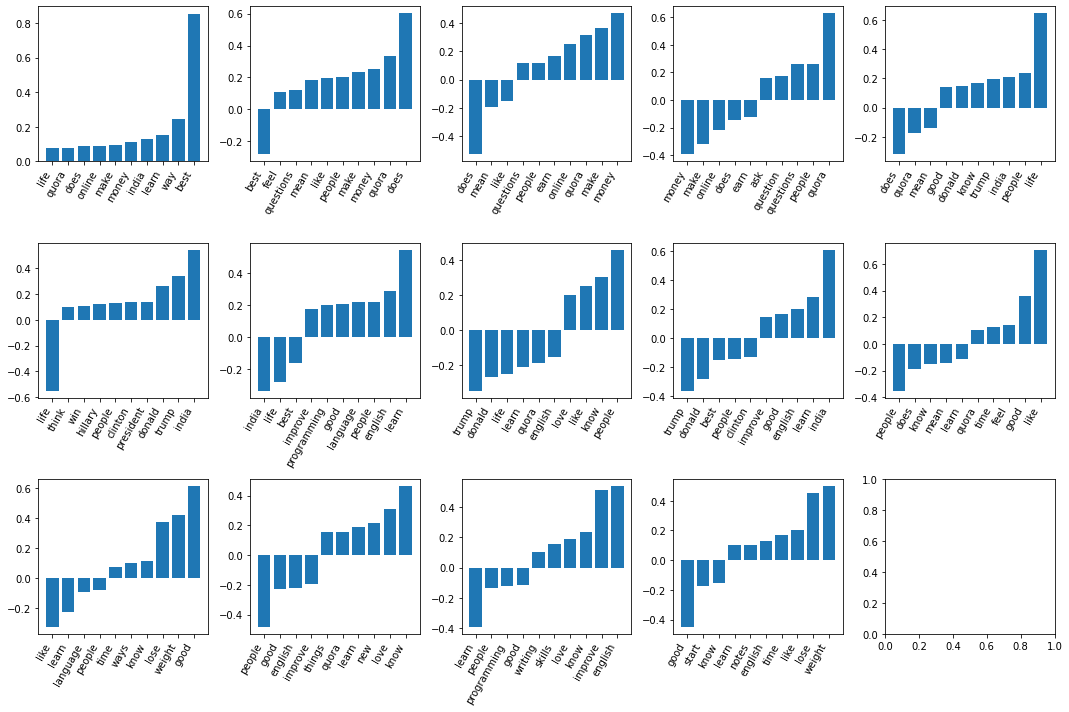

In [37]:
feature_names = np.array(tfidf.get_feature_names())
n_components = 14
fig, axes = plt.subplots(3,5, figsize=(15, 10))
for ax, coef in zip(axes.ravel(), model.components_):
    plot_important_features(coef, feature_names, top_n=10, ax=ax)
    
plt.tight_layout()

**Randomized Truncated SVD**

In [38]:
from sklearn.decomposition import randomized_svd

In [39]:
u, s, v = randomized_svd(train_vectors,n_components=14)

In [40]:
u.shape

(404289, 14)

In [41]:
s.shape

(14,)

In [42]:
v.shape

(14, 36766)

**Viewing the topics**

In [43]:
for index,topic in enumerate(v):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    print([tfidf.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')

THE TOP 15 WORDS FOR TOPIC #0
['programming', 'ways', 'book', 'books', 'movies', 'life', 'quora', 'does', 'online', 'make', 'money', 'india', 'learn', 'way', 'best']


THE TOP 15 WORDS FOR TOPIC #1
['trump', 'question', 'earn', 'work', 'life', 'online', 'feel', 'questions', 'mean', 'like', 'people', 'make', 'money', 'quora', 'does']


THE TOP 15 WORDS FOR TOPIC #2
['black', 'answer', 'youtube', 'answers', 'ways', 'way', 'ask', 'question', 'questions', 'people', 'earn', 'online', 'quora', 'make', 'money']


THE TOP 15 WORDS FOR TOPIC #3
['know', 'answered', 'easily', 'improvement', 'delete', 'asked', 'google', 'best', 'answers', 'answer', 'ask', 'question', 'questions', 'people', 'quora']


THE TOP 15 WORDS FOR TOPIC #4
['president', 'thing', 'love', 'purpose', 'things', 'did', 'think', 'like', 'good', 'donald', 'know', 'trump', 'india', 'people', 'life']


THE TOP 15 WORDS FOR TOPIC #5
['notes', 'world', 'election', 'pakistan', 'war', 'did', 'think', 'win', 'hillary', 'people', 'clinto

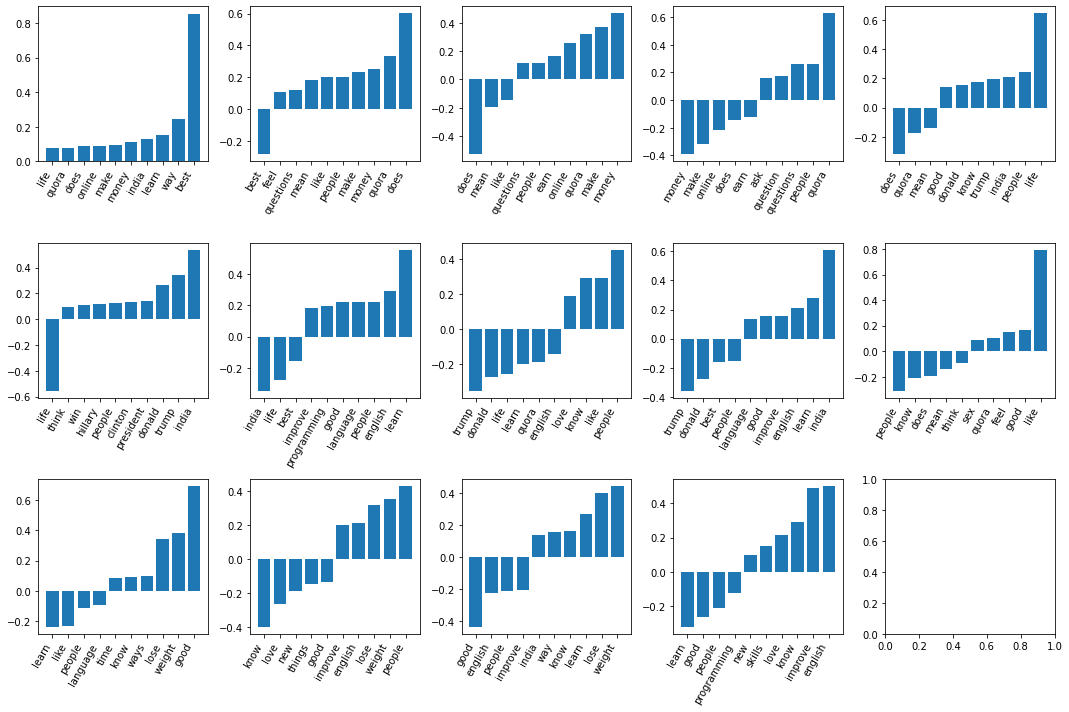

In [44]:
feature_names = np.array(tfidf.get_feature_names())
n_components = 14
fig, axes = plt.subplots(3,5, figsize=(15, 10))
for ax, coef in zip(axes.ravel(), v):
    plot_important_features(coef, feature_names, top_n=10, ax=ax)
    
plt.tight_layout()

**Randomized SVD FB**

In [49]:
!pip install fbpca

In [47]:
import fbpca
u, s, v = fbpca.pca(train_vectors,14)

In [48]:
for index,topic in enumerate(v):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    print([tfidf.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')

THE TOP 15 WORDS FOR TOPIC #0
['hillary', 'think', 'work', 'clinton', 'did', 'know', 'donald', 'questions', 'feel', 'trump', 'mean', 'people', 'like', 'quora', 'does']


THE TOP 15 WORDS FOR TOPIC #1
['google', 'youtube', 'ways', 'answer', 'answers', 'ask', 'way', 'question', 'questions', 'people', 'earn', 'online', 'make', 'quora', 'money']


THE TOP 15 WORDS FOR TOPIC #2
['use', 'work', 'google', 'answers', 'answer', 'people', 'feel', 'ask', 'question', 'like', 'mean', 'best', 'questions', 'does', 'quora']


THE TOP 15 WORDS FOR TOPIC #3
['google', 'did', 'trump', 'things', 'language', 'better', 'question', 'programming', 'life', 'ask', 'know', 'questions', 'learn', 'people', 'quora']


THE TOP 15 WORDS FOR TOPIC #4
['know', 'life', 'thing', 'election', 'like', 'think', 'win', 'best', 'hillary', 'president', 'clinton', 'india', 'people', 'donald', 'trump']


THE TOP 15 WORDS FOR TOPIC #5
['important', 'live', 'sex', 'best', 'know', 'meaning', 'thing', 'year', 'purpose', 'like', 'worl

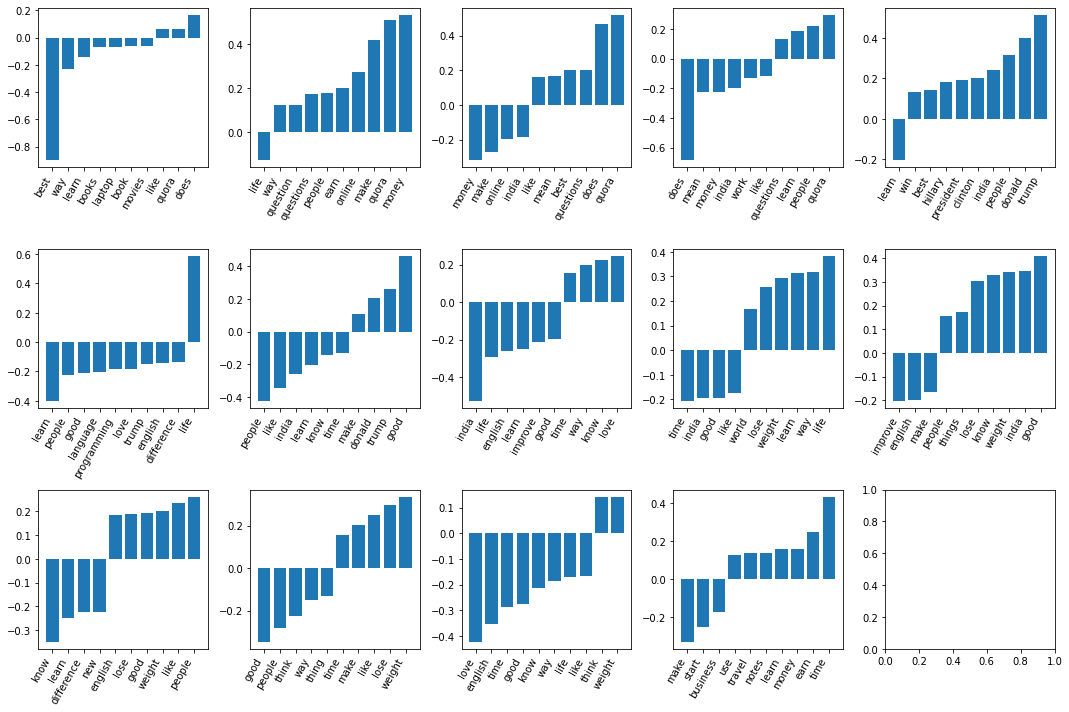

In [50]:
feature_names = np.array(tfidf.get_feature_names())
n_components = 5
fig, axes = plt.subplots(3,5, figsize=(15, 10))
for ax, coef in zip(axes.ravel(), v):
    plot_important_features(coef, feature_names, top_n=10, ax=ax)
    
plt.tight_layout()

**LDA**

In [58]:
from sklearn.decomposition import LatentDirichletAllocation
model = LatentDirichletAllocation(n_components=14,random_state=42)

In [59]:
# fit the model to train data
model.fit(train_vectors)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=14, n_jobs=None,
                          perp_tol=0.1, random_state=42, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [60]:
for index,topic in enumerate(model.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    print([tfidf.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')

THE TOP 15 WORDS FOR TOPIC #0
['think', 'countries', 'iq', 'education', 'indian', 'does', 'people', 'india', 'math', 'buy', 'laptop', 'meaning', 'country', 'best', 'favorite']


THE TOP 15 WORDS FOR TOPIC #1
['delete', 'recover', 'does', 'way', 'email', 'best', 'gmail', 'hack', 'whatsapp', 'password', 'number', 'phone', 'account', 'instagram', 'facebook']


THE TOP 15 WORDS FOR TOPIC #2
['people', 'porn', 'water', 'does', 'god', 'hair', 'ways', 'online', 'way', 'youtube', 'best', 'money', 'lose', 'weight', 'make']


THE TOP 15 WORDS FOR TOPIC #3
['google', 'asked', 'books', 'visit', 'answers', 'places', 'read', 'answer', 'people', 'ask', 'question', 'best', 'love', 'questions', 'quora']


THE TOP 15 WORDS FOR TOPIC #4
['year', 'presidential', 'india', 'com', 'does', 'new', 'election', 'did', 'war', 'win', 'hillary', 'clinton', 'president', 'donald', 'trump']


THE TOP 15 WORDS FOR TOPIC #5
['smartphone', 'mobile', 'apps', 'watch', 'mind', 'use', 'used', 'sentence', 'does', 'app', 'diff

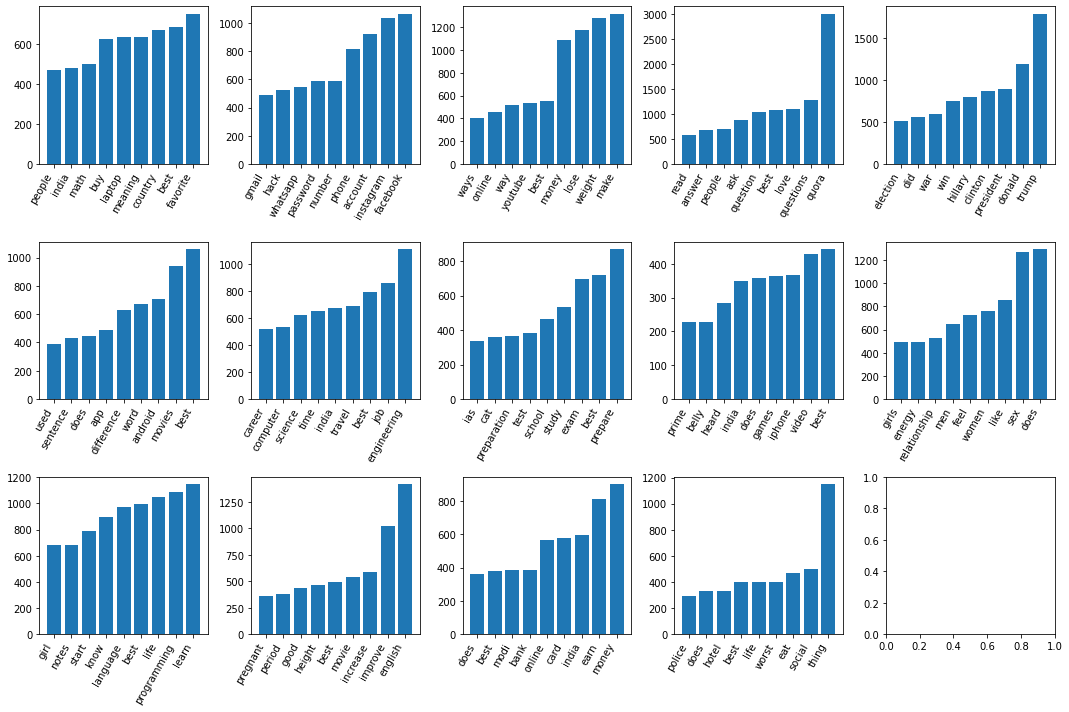

In [61]:
feature_names = np.array(tfidf.get_feature_names())
n_components = 14
fig, axes = plt.subplots(3,5, figsize=(15, 10))
for ax, coef in zip(axes.ravel(), model.components_):
    plot_important_features(coef, feature_names, top_n=9, ax=ax)
    
plt.tight_layout()

### We observe that LDA gives the best results by grouping relevant words together in different topics and helps to identify different categories of topics mentioned in the quora dataset.